<a href="https://colab.research.google.com/github/mukami3juma/Hypothyroidism/blob/main/WEEK_8_Hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the Question

Nairobi Hospital wants to build a model that determines whether or not a patient's symptoms indicate that they have hypothyroid having collected data focusing on Thyroid patients from a clinical camp to test for hypothyroidism.

## b) Defining the Metric for Success

Being that this is a classification problem,the project will be considered successful if the models created are able to predict results of a patient's presence of hypothyroid or not at an accuracy rate of atleast 70% but below 100%.

## c) Understanding the context


A clinical camp is conducted on people exhibiting various symptoms,and whether they have hypothyroidism or not and the data is recorded. This data is therefore tweaked in order to determine whether a different sample of patients have hypothyroidism or not based on the pre-recorded sample's data.

## d) Experimental Design

In order to work on the above problem we will perform an EDA,create Random forests, Ada boosted trees, and gradient boosted trees.Try and optimize each of the 2 models, making sure to document how the hyperparameters have been set up. Identify which of the 2 models is the most trustworthy, and use it to determine which features are most impactful in influencing the prediction.

Using support vector machines,we will document the transformation done on the data,apply Polynomial, linear and rbf kernel function to build the SVM model and then evaluate their performance and pick the kernel that performs the best. Tune the parameters to improve the performance of the model.

## e) Data Relevance

The relavance of our data is backed by a hypothyroidism patient status dataset consisting of sufficient samples and features that will be used for this problem.



# 2. Loading Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix



In [ ]:
# load data
med = pd.read_csv('http://bit.ly/hypothyroid_data')
med.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# checking size of dataset
med.shape

(3163, 26)

# 3. Data Preprocessing

In [ ]:
# check for null values
med.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
# checking for duplicates
print(med.duplicated().sum())

print('...................................')
# removing duplicates
med.drop_duplicates(inplace=True)
print(med.duplicated().sum())

print('...................................')
# new dataset shape
print(med.shape)

77
...................................
0
...................................
(3086, 26)


In [ ]:
# check for datatypes
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3086 non-null   object
 1   age                        3086 non-null   object
 2   sex                        3086 non-null   object
 3   on_thyroxine               3086 non-null   object
 4   query_on_thyroxine         3086 non-null   object
 5   on_antithyroid_medication  3086 non-null   object
 6   thyroid_surgery            3086 non-null   object
 7   query_hypothyroid          3086 non-null   object
 8   query_hyperthyroid         3086 non-null   object
 9   pregnant                   3086 non-null   object
 10  sick                       3086 non-null   object
 11  tumor                      3086 non-null   object
 12  lithium                    3086 non-null   object
 13  goitre                     3086 non-null   object
 14  TSH_meas

In [ ]:
# checking for anomalies
for i in med:
  print('Column name:',i,med[i].unique())

Column name: status ['hypothyroid' 'negative']
Column name: age ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
Column name: sex ['M' 'F' '?']
Column name: on_thyroxine ['f' 't']
Column name: query_on_thyroxine ['f' 't']
Column name: on_antithyroid_medication ['f' 't']
Column name: thyroid_surgery ['f' 't']
Column name: query_hypothyroid ['f' 't']
Column name: query_hyperthyroid ['f' 't']
Column name: pregnant ['f' 't']
Column name: sick ['f' 't']
Column name: tumor ['f' 't']
Column name: lithium ['f' 't']
Column name: goitre ['f' 't']
Column name: TSH_measured ['y' 'n']
Colum

In [ ]:
# checking counts for columns with inputs '?' 
for i in med:
  if ((med[i]=='?').sum())>0:
    print(i,':' ,(med[i]=='?').sum())

age : 438
sex : 73
TSH : 455
T3 : 680
TT4 : 240
T4U : 239
FTI : 238
TBG : 2835


In [ ]:
# replacing sex value inputs '?' with categorical value Non-binary
med.sex.replace(to_replace='?', value='Non_binary', inplace=True)
med.sex.unique()

array(['M', 'F', 'Non_binary'], dtype=object)

In [ ]:
# replacing the other '?' value inputs with quantitative values(0)
med.replace(to_replace='?', value=0, inplace=True)
for i in med:
  print(i,':' ,(med[i]=='?').sum())

status : 0
age : 0
sex : 0
on_thyroxine : 0
query_on_thyroxine : 0
on_antithyroid_medication : 0
thyroid_surgery : 0
query_hypothyroid : 0
query_hyperthyroid : 0
pregnant : 0
sick : 0
tumor : 0
lithium : 0
goitre : 0
TSH_measured : 0
TSH : 0
T3_measured : 0
T3 : 0
TT4_measured : 0
TT4 : 0
T4U_measured : 0
T4U : 0
FTI_measured : 0
FTI : 0
TBG_measured : 0
TBG : 0


In [ ]:
med.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Creating and converting the data type for columns below from object to category
med[['status_c','sex_c','on_thyroxine_c','query_on_thyroxine_c','on_antithyroid_medication_c',
     'thyroid_surgery_c','query_hypothyroid_c',
     'query_hyperthyroid_c', 'pregnant_c', 'sick_c', 
     'tumor_c', 'lithium_c', 'goitre_c']]=med[['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                                         'query_hypothyroid','query_hyperthyroid', 'pregnant',
                                         'sick', 'tumor', 'lithium', 'goitre']].astype('category')
print(med[['sex_c','on_thyroxine_c','query_on_thyroxine_c','on_antithyroid_medication_c',
     'thyroid_surgery_c','query_hypothyroid_c',
     'query_hyperthyroid_c', 'pregnant_c', 'sick_c', 
     'tumor_c', 'lithium_c', 'goitre_c']])


     sex_c on_thyroxine_c query_on_thyroxine_c  ... tumor_c lithium_c goitre_c
0        M              f                    f  ...       f         f        f
1        F              t                    f  ...       f         f        f
2        M              f                    f  ...       f         f        f
3        F              f                    f  ...       f         f        f
4        M              f                    f  ...       f         f        f
...    ...            ...                  ...  ...     ...       ...      ...
3158     F              f                    f  ...       f         f        f
3159     F              f                    f  ...       f         f        f
3160     M              f                    f  ...       f         f        f
3161     F              f                    f  ...       f         f        f
3162     F              t                    f  ...       f         f        f

[3086 rows x 12 columns]


In [ ]:
# converting these object datatypes into numerical
med[['TSH','T3','TT4','T4U','FTI','TBG']]=med[['TSH','T3','TT4','T4U','FTI','TBG']].astype('float')

In [ ]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   status                       3086 non-null   object  
 1   age                          3086 non-null   object  
 2   sex                          3086 non-null   object  
 3   on_thyroxine                 3086 non-null   object  
 4   query_on_thyroxine           3086 non-null   object  
 5   on_antithyroid_medication    3086 non-null   object  
 6   thyroid_surgery              3086 non-null   object  
 7   query_hypothyroid            3086 non-null   object  
 8   query_hyperthyroid           3086 non-null   object  
 9   pregnant                     3086 non-null   object  
 10  sick                         3086 non-null   object  
 11  tumor                        3086 non-null   object  
 12  lithium                      3086 non-null   object  
 13  goi

In [ ]:
# converting new columns' to numbers
cat_columns = med.select_dtypes(['category']).columns
cat_columns

med[cat_columns] = med[cat_columns].apply(lambda x: x.cat.codes)
med.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,status_c,sex_c,on_thyroxine_c,query_on_thyroxine_c,on_antithyroid_medication_c,thyroid_surgery_c,query_hypothyroid_c,query_hyperthyroid_c,pregnant_c,sick_c,tumor_c,lithium_c,goitre_c
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0


Notice that in status, hypothyroid is assigned 0 while negative is assigned 1. In sex,M is assigned 1 while F is assigned 0 and Non_binary,2.
In the rest of the columns,f(false) is assigned 0 while t(true) is assigned 1.

# Part 1: Decision Tree

In [ ]:
# we use classifier model since the target variable(status) is categorical
test_features = med[['age','sex_c', 'on_thyroxine_c', 'query_on_thyroxine_c',
       'on_antithyroid_medication_c', 'thyroid_surgery_c',
       'query_hypothyroid_c', 'query_hyperthyroid_c', 'pregnant_c', 'sick_c',
       'tumor_c', 'lithium_c', 'goitre_c','TSH','T3','TT4','T4U','FTI','TBG']]
# splitting dataset
x = test_features.values
y = med['status_c'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Create a decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train it on our training set.
dt = dt.fit(x_train,y_train)

# Predict based on the model we've trained
y_pred_tree = dt.predict(x_test)


from sklearn import metrics
# checking for model accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9870550161812298


The model is 98.7% accurate.

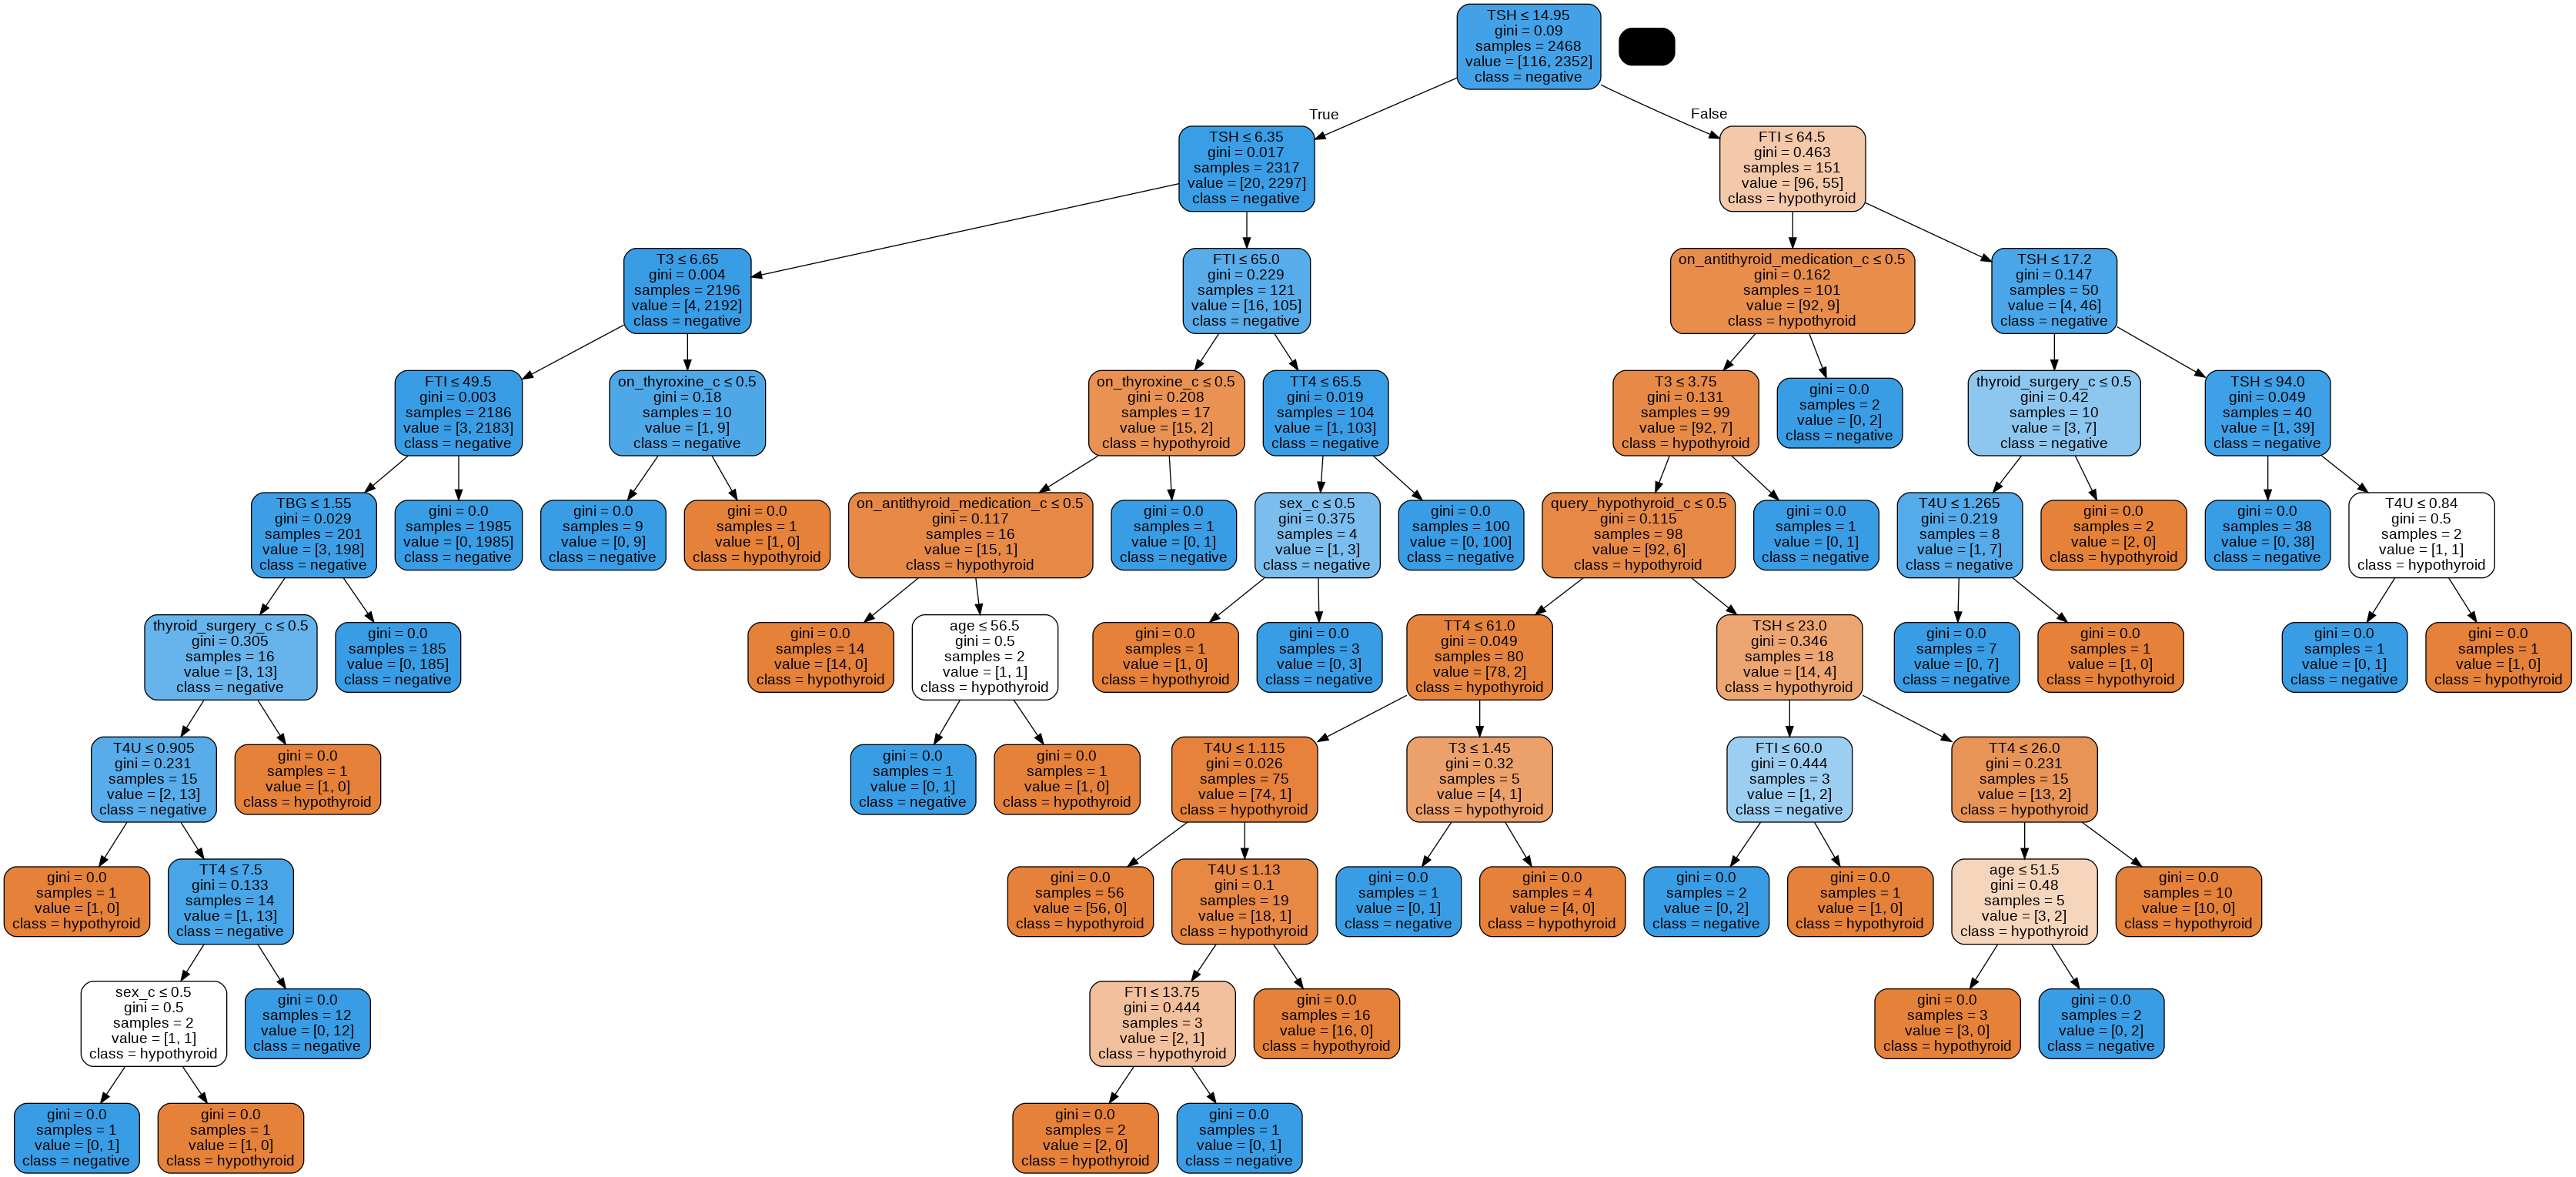

In [ ]:
!pip install --upgrade scikit-learn==0.20.3
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features.columns.tolist(),class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism.png')
Image(graph.create_png())

Starting from the root node, The first test we perform is based on TSH lithium and the datasets are split based on a value 14.95. The value parameter value = [116,2352] means that in our current training set, there are 116 people with hypothyroidism and 2352 without. Because of this majority,the root node has a class of negative.

The left child of the root node has a class of negative(no hypothyroidism), indicating that the left side of our tree should have a bias towards people without the disease. The values [20,2297] show this and using that first test, we were able to isolate almost all people without hypothyroidism. The right child of the root node has a hypothyroid class, with values to match: [96,55]

The features that were not used were goitre,lithium,tumor,sick,pregnant,query_hyperthyroid and query_on_thyroxine suggesting that our dependent variable does not majorly depend on them.


# Using Random trees to determine feature importance

In [ ]:
test_features = med[['age','sex_c', 'on_thyroxine_c', 'query_on_thyroxine_c',
       'on_antithyroid_medication_c', 'thyroid_surgery_c',
       'query_hypothyroid_c', 'query_hyperthyroid_c', 'pregnant_c', 'sick_c',
       'tumor_c', 'lithium_c', 'goitre_c','TSH','T3','TT4','T4U','FTI','TBG']]
# splitting dataset
x = test_features.values
y = med['status_c'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Import the model
# !pip uninstall sklearn
# !pip uninstall scikit-learn
# !pip install sklearn
from sklearn.ensemble import RandomForestClassifier
# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest = forest.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred_tree = forest.predict(x_test)


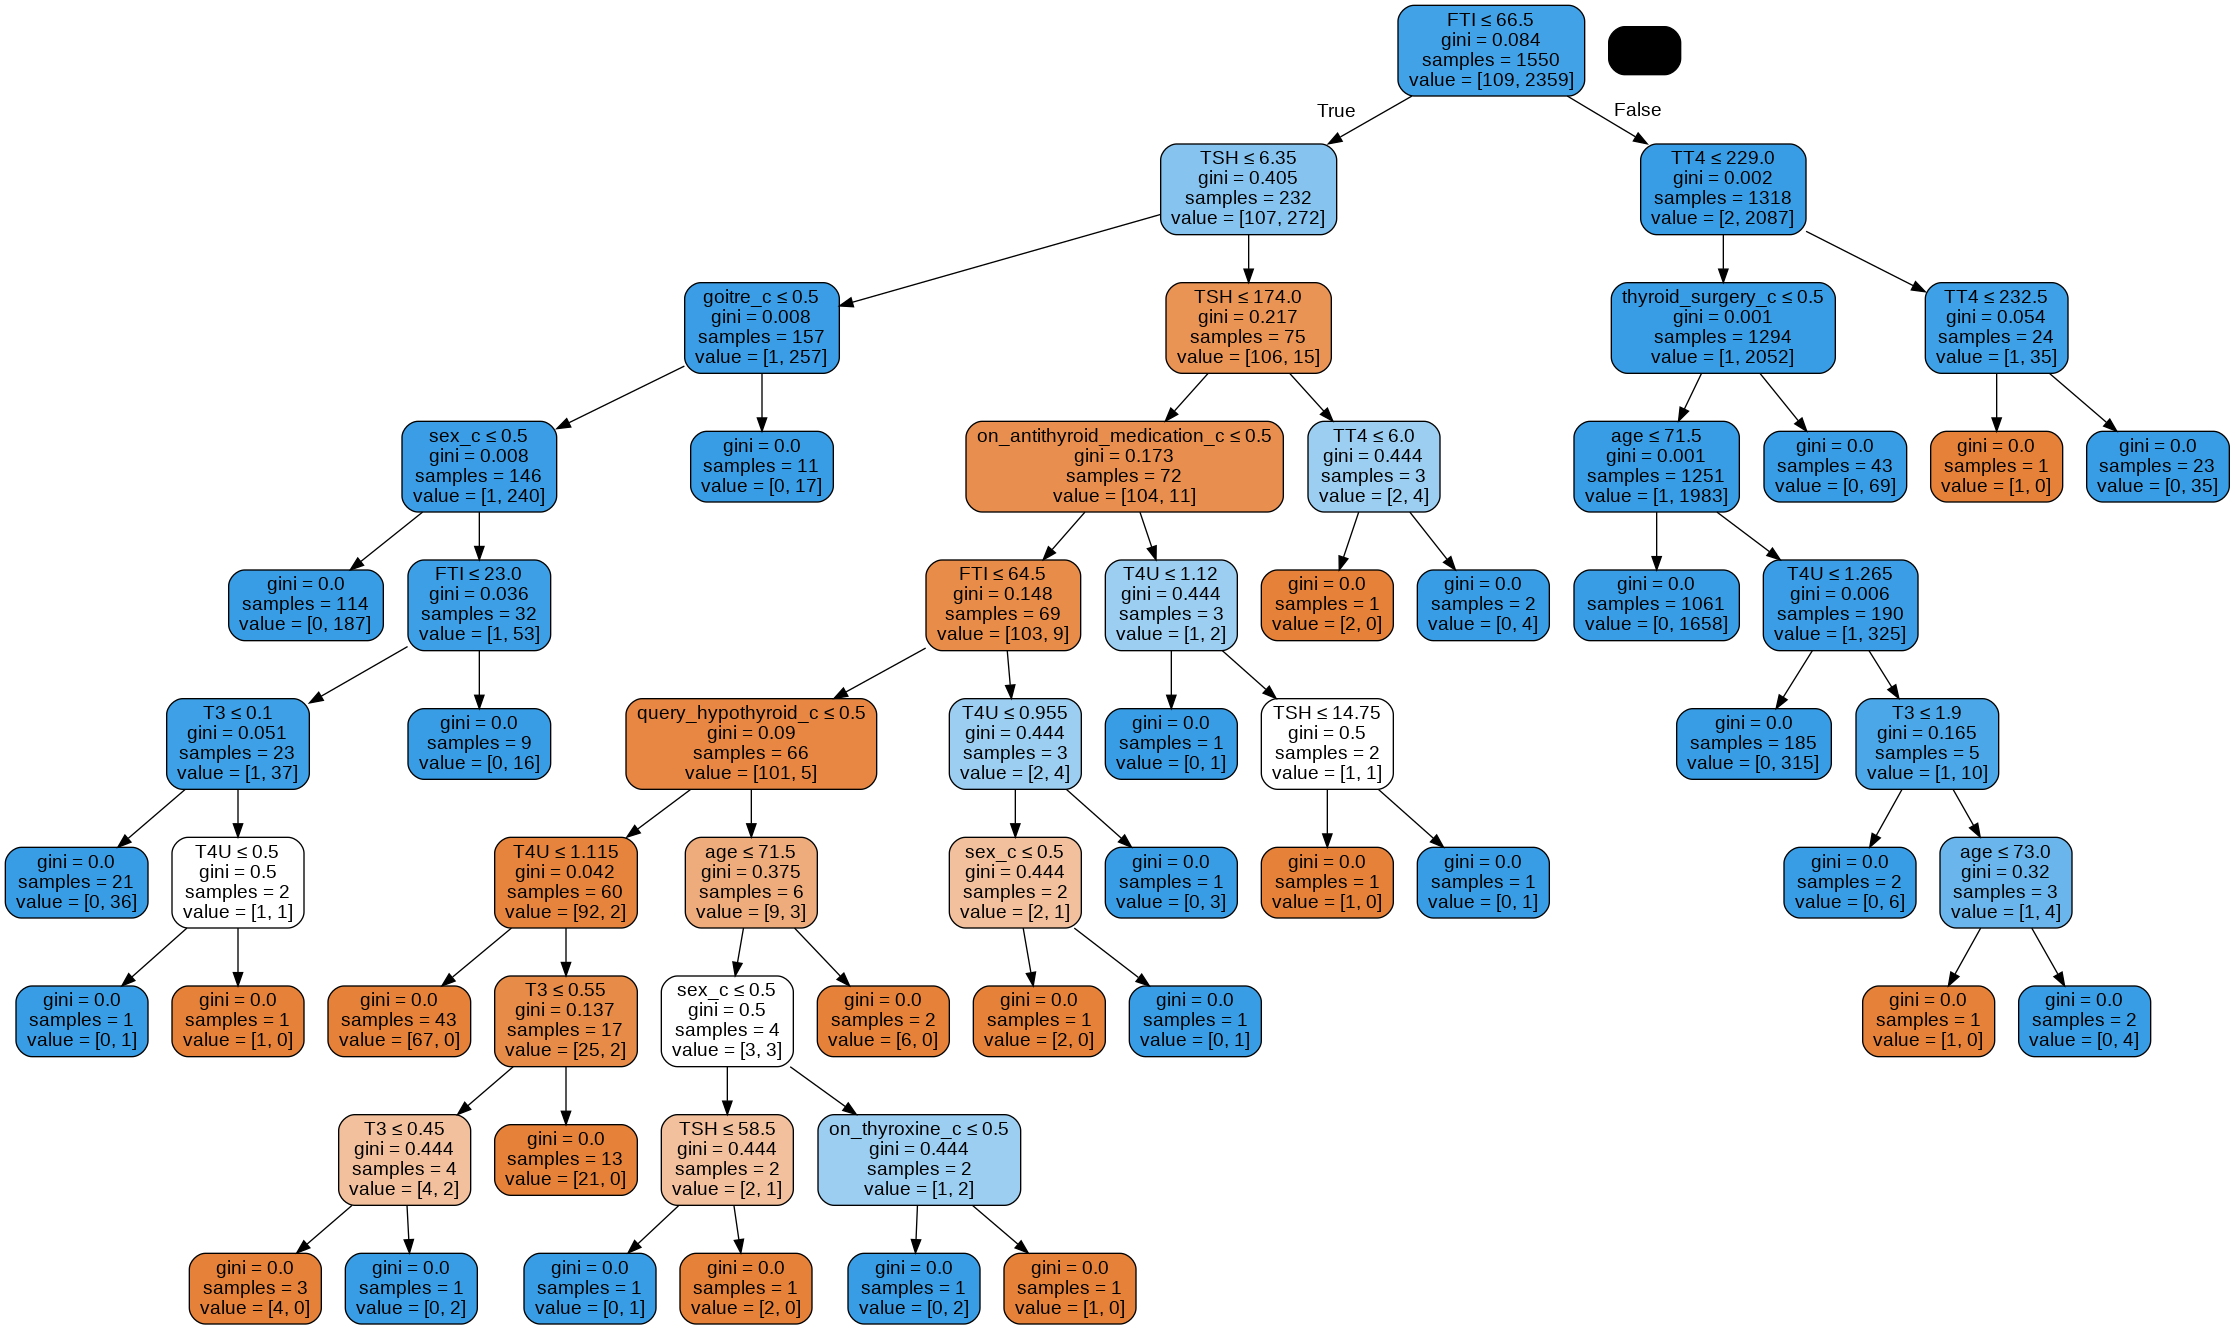

In [ ]:
!pip install --upgrade scikit-learn==0.20.3
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features.columns.to_list())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())


Notice goitre is featured here whereas it was not featured in the decision tree.

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex_c', 0.01), ('on_thyroxine_c', 0.01), ('query_on_thyroxine_c', 0.0), ('on_antithyroid_medication_c', 0.01), ('thyroid_surgery_c', 0.0), ('query_hypothyroid_c', 0.01), ('query_hyperthyroid_c', 0.0), ('pregnant_c', 0.0), ('sick_c', 0.0), ('tumor_c', 0.0), ('lithium_c', 0.0), ('goitre_c', 0.0), ('TSH', 0.63), ('T3', 0.02), ('TT4', 0.02), ('T4U', 0.01), ('FTI', 0.26), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.63
Variable: FTI                  Importance: 0.26
Variable: T3                   Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: age                  Importance: 0.01
Variable: sex_c                Importance: 0.01
Variable: on_thyroxine_c       Importance: 0.01
Variable: on_antithyroid_medication_c Importance: 0.01
Variable: query_hypothyroid_c  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: query_on_thyroxine_c Importance: 0.0
Variable: thyroid_surgery_c    Importance: 0.0
Variable: query_

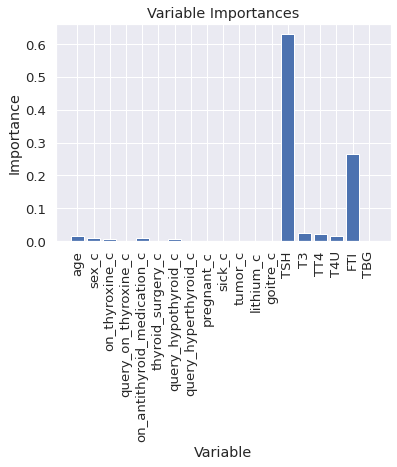

In [ ]:
# visualization of feature importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


Conclusion from the graph above is that, when trying to predict the status, we only need 10 variables with their respective importance: TSH(0.63), FTI(0.26), T3(0.02), TT4(0.02), age(0.01), sex_c(0.01), on_thyroxine_c(0.01),on_antithyroid_medication_c(0.01), query_hypothyroid_c(0.01) and T4U(0.01)

In [ ]:
from sklearn import metrics
# checking for model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9902912621359223


The forest model seems to be more accurate than the decision tree model at 99.03%

# ADA boosting and gradient boosting

In [ ]:
# creating an ada boost model

test_features = med[['age','sex_c', 'on_thyroxine_c', 'query_on_thyroxine_c',
       'on_antithyroid_medication_c', 'thyroid_surgery_c',
       'query_hypothyroid_c', 'query_hyperthyroid_c', 'pregnant_c', 'sick_c',
       'tumor_c', 'lithium_c', 'goitre_c','TSH','T3','TT4','T4U','FTI','TBG']]
# splitting dataset
x = test_features
y = med['status_c']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada = ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)

from sklearn import metrics
# checking for model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))


Accuracy: 0.988673139158576


98.86% accuracy showing poor performance compared to the random forest model but slightly better than the decision tree model.

In [ ]:
#creating a gradient boost model
test_features = med[['age','sex_c', 'on_thyroxine_c', 'query_on_thyroxine_c',
       'on_antithyroid_medication_c', 'thyroid_surgery_c',
       'query_hypothyroid_c', 'query_hyperthyroid_c', 'pregnant_c', 'sick_c',
       'tumor_c', 'lithium_c', 'goitre_c','TSH','T3','TT4','T4U','FTI','TBG']]
# splitting dataset
x = test_features
y = med['status_c']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0)
gbc = gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

from sklearn import metrics
# checking for model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbc))



Accuracy: 0.9935275080906149


At 99.35%,this model is the most accurate so far so good

# Part 2: Support Vector Machine

#### Linear kernel model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


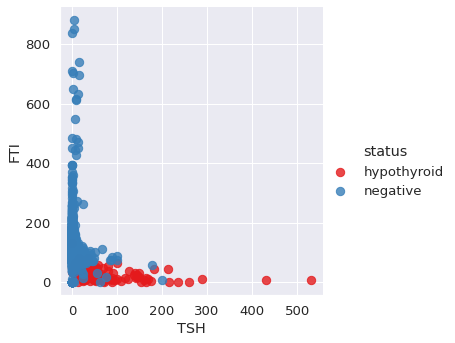

In [ ]:
# plotting the desired features with the highest importance as seen in random forest model
sns.lmplot('TSH','FTI', data=med, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [ ]:
# Specify the input for the model
# splitting dataset
x = med[['TSH','FTI']]
# Put a label of either a case of hypothyroidism or not and assign it 0 or 1
y = np.where(med['status']=='hypothyroid',0,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Fit the model
model = SVC(kernel= 'linear')
model.fit(x_train,y_train)

# Predict the response for the test set
y_pred = model.predict(x_test)
y_pred.shape


(618,)

In [ ]:
#checking for accuracy
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9789644012944984

The prior models have a higher accuracy score than the linear one(97.89%)

In [ ]:
# Function that predicts whether a patient has hypothyroid or note
def sick_or_not(TSH,FTI):
    if(model.predict([[TSH,FTI]]))==0:
        print('Patient has thyroid!')
    else:
        print('Patient is negative of thyroid!')

# Predict if TSH of 60 and FTIof 30
sick_or_not(60, 30)

Patient has thyroid!


#### Polynomial kernel model

In [ ]:
med.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,status_c,sex_c,on_thyroxine_c,query_on_thyroxine_c,on_antithyroid_medication_c,thyroid_surgery_c,query_hypothyroid_c,query_hyperthyroid_c,pregnant_c,sick_c,tumor_c,lithium_c,goitre_c
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimensional plane because the dataset has atleast 20 features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

test_features = med[['age','sex_c', 'on_thyroxine_c', 'query_on_thyroxine_c',
       'on_antithyroid_medication_c', 'thyroid_surgery_c',
       'query_hypothyroid_c', 'query_hyperthyroid_c', 'pregnant_c', 'sick_c',
       'tumor_c', 'lithium_c', 'goitre_c','TSH','T3','TT4','T4U','FTI','TBG']]
# splitting dataset
y = med['status_c'].values

# Applying the reduction algorithm: PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(test_features)
x = pca.transform(test_features)
x.shape

(3086, 2)

In [ ]:
# splitting dataset
x = x
y = med['status_c'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
!pip install sklearn
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly')
# Training the model using the training set
polyclassifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Visualization
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroidism  Classification with polynomial SVC')
# Set-up grid for plotting.
x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(x0, x1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred_poly = polyclassifier.predict(x_test)

In [ ]:
# Model Evaluation
# print( accuracy_score(y_test, y_pred_poly))
# print(confusion_matrix(y_test, y_pred_poly))

#### Radial Basis Function kernel model

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(x_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroidism Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred_rbf = rbfclassifier.predict(x_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))